In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
datasets = ["Japan, 2024"]

In [3]:
# df_haiti = pd.read_csv('0f_haiti.csv', parse_dates=['date'], dayfirst=True)
# df_turkey = pd.read_csv('0f_turkey.csv', parse_dates=['date'])
# df_mexico = pd.read_csv('0f_mexico.csv')
# df_mexico['date'] = pd.to_datetime(df_mexico['date'], format='%d_%m_%Y')
# df_iraq = pd.read_csv('0f_iraq_iran.csv')
# df_iraq['date'] = pd.to_datetime(df_iraq['date'], format='%d_%m_%Y')
df_japan = pd.read_csv('JP10days.csv')
df_japan['date'] = pd.to_datetime(df_japan['time stamp'], format='%d-%m-%Y')
# df_japan['date'] = df_japan['date'].apply(lambda x: x.replace(year=2024))

In [4]:
earthquake_data = {
    'Date': ['2024-01-01'],
    'Magnitude': [7.6]
}
earthquake_data['Date'] = pd.to_datetime(earthquake_data['Date'])

total_rows = len(df_japan)
num_rows = [len(df_japan) / total_rows]
t = [len(df_japan)]

In [5]:
def plot_rescaled_2d_data(x, y, z, datasets):
    plt.figure(figsize=(12, 7))

    # Scatter plot with refined parameters
    scatter = plt.scatter(
        x, y, c=z, s=300, cmap='plasma', edgecolor='white', linewidth=0.75, alpha=0.9
    )

    # Colorbar customization
    cbar = plt.colorbar(scatter)
    cbar.set_label('Magnitude', fontsize=14, fontweight='bold', color='darkslategray')
    cbar.ax.tick_params(labelsize=12)

    # Title and labels with enhanced font style
    plt.title('Earthquake Data Visualization (Rescaled)', fontsize=18, fontweight='bold', color='darkblue', pad=20)
    plt.xlabel('Date', fontsize=14, fontweight='bold', color='darkslategray')
    plt.ylabel('Number of Tweets', fontsize=14, fontweight='bold', color='darkslategray')

    # Rescale y-axis limits to focus on the important data points
    plt.ylim(0, 50000)

    # Format x-axis for dates
    locator = mdates.AutoDateLocator()
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Rotate x-axis labels and style ticks
    plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold', color='dimgray')
    plt.yticks(fontsize=12, fontweight='bold', color='dimgray')

    # Annotating the points with dataset names
    for i, txt in enumerate(datasets):
        plt.annotate(txt, (x[i], y[i]), fontsize=10, xytext=(5, 5), textcoords='offset points', fontweight='bold', color='darkred')

    # Adding gridlines for better readability
    # plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the improved plot
    plt.show()



In [6]:
dfs = [df_japan]
colors = px.colors.qualitative.Plotly

In [7]:
fig_entries_per_date = px.line()

In [8]:
for i, df in enumerate(dfs):
    df_entries_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='text')
    fig_entries_per_date.add_scatter(x=df_entries_per_date['date'], y=df_entries_per_date['text'], mode='markers+lines', name=datasets[i])

In [9]:
fig_entries_per_date.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Tweets',
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better readability
    legend_title="Datasets",
    showlegend=True,
    xaxis_rangeslider_visible=True  # Add range slider for interactive zooming
)
fig_entries_per_date.show()

In [10]:
fig_entries_per_date_log = px.line()

for i, df in enumerate(dfs):
    df_entries_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='text')
    df_entries_per_date['text'] = np.log(df_entries_per_date['text'] + 1)  # Apply log-scaling
    fig_entries_per_date_log.add_scatter(x=df_entries_per_date['date'], y=df_entries_per_date['text'], mode='markers+lines', name=datasets[i])

# Update layout for log-scaled plot
fig_entries_per_date_log.update_layout(
    xaxis_title='Date',
    yaxis_title='Log(Number of Entries)',
    xaxis_tickangle=-45,
    legend_title="Datasets",
    showlegend=True,
    xaxis_rangeslider_visible=True
)
fig_entries_per_date_log.show()

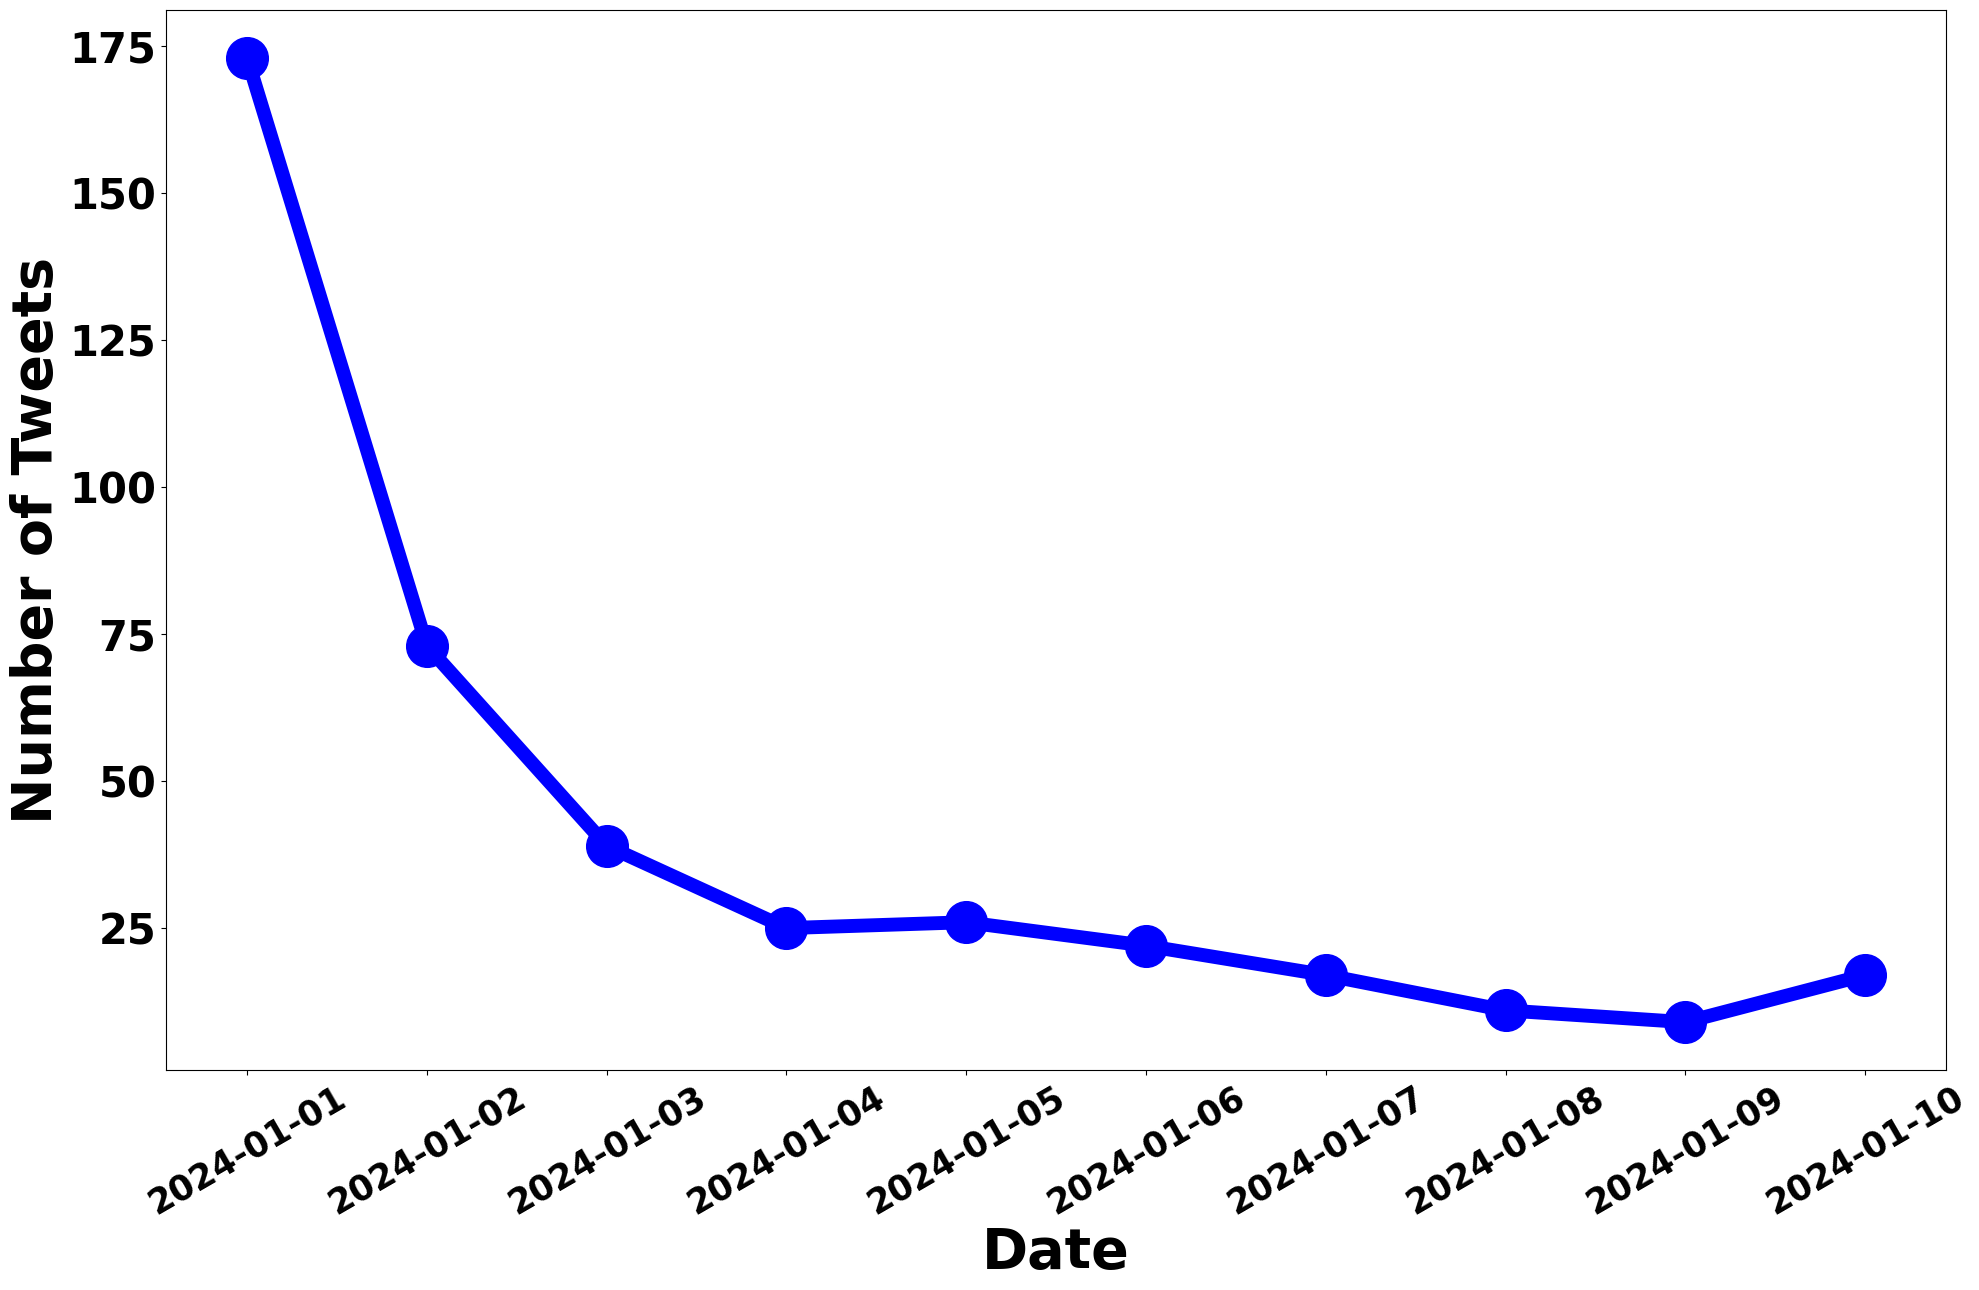

In [23]:
colors = ['b', 'g', 'r', 'm', 'y', 'k', 'orange', 'purple', 'brown']  # Add more if needed

# Function to create individual plots for each dataset with unique colors and larger markers
def plot_individual_datasets(dfs, datasets):
    for i, df in enumerate(dfs):
        # Group by date and count the entries per day
        df_entries_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='count')
        
        # Create the plot
        plt.figure(figsize=(20, 13))
        
        # Use a different color for each dataset, increase marker size
        plt.plot(df_entries_per_date['date'], df_entries_per_date['count'], 
                 marker='o', linestyle='-', color=colors[i % len(colors)], 
                 markersize=30, linewidth=10)  # Increased marker size

        # Customize the plot for research paper aesthetics
        # plt.title(f'Number of Entries per Day - {datasets[i]}', fontsize=14, fontweight='bold')
        plt.xlabel('Date', fontsize=40, fontweight='bold')
        plt.ylabel('Number of Tweets', fontsize=40, fontweight='bold')
        
        # Set date labels on x-axis for all available dates
        plt.xticks(df_entries_per_date['date'], rotation=30, ha='center', fontsize=25,fontweight='bold')
        plt.yticks(fontsize=30,fontweight='bold')
        
        # Adjust plot margins for better label visibility
        plt.tight_layout()

        # Save the plot as an image (to use in a research paper)
        plt.savefig(f'{datasets[i]}_entries_per_day.png', dpi=300)

        # Show the plot
        plt.show()


# Generate the plots
plot_individual_datasets(dfs, datasets)